# Quickstart

In [1]:
import AlloViz

## System setup

The [Protein](../api/AlloViz.Protein.rst) class constructor processes the input data to prepare it for the downstream calculations, analyses and visualization.

A structure and strided Molecular Dynamics simulation of SARS-CoV2's NSP3 protein (from [SCov2-MD database](https://submission.gpcrmd.org/covid19/259/)) are included in the `test` folder in AlloViz. Multiple trajectories can be passed in a list, e.g.: `["../test/data/traj_1.xtc", "../test/data/traj_2.xtc", "../test/data/traj_3.xtc"]`

In [2]:
system = AlloViz.Protein(pdb="../test/data/protein.pdb",
                         trajs="../test/data/traj_1.xtc")

/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


### Network calculation

AlloViz brings together 8 different Python packages, previously peer-reviewed and published, which allow the construction of allosteric communication networks using different descriptors (plus a network construction method we implemented ourselves). All the available options can be found in [this table](../table.rst) (the last column has the names to be used in the [calculate](../api/AlloViz.Protein.calculate.rst) method below).

We are going to use `pytraj_CA` as network construction method, which measures the correlation of the residues' alpha-carbons positions along the trajectory using the Pearson's correlation coefficient. Multiple networks can be calculated at the same time supplying a list of names, e.g. `["pytraj_CA", "pytraj_CB"]`

In [3]:
system.calculate(pkgs="pytraj_CA")

pytraj_CA
adding raw data of pytraj_CA for ../test/data/protein.pdb:  ['./data/pytraj_CA/raw/1.pq']


The calculated raw data is both saved as a file for reconstitution later and added as an attribute of the Protein object:

In [4]:
system.pytraj_CA.raw

weight
VAL:3   ASN:4    0.761503
        SER:5    0.222442
        PHE:6   -0.321400
        SER:7   -0.413723
        GLY:8   -0.408100
...                   ...
PHE:168 GLU:170  0.582612
        MET:171  0.199945
LEU:169 GLU:170  0.707977
        MET:171  0.322396
GLU:170 MET:171  0.686412

[14196 rows x 1 columns]

### Network filtering

AlloViz allows to filter the calculated networks according to different criteria (the different options are each of the functions defined in the [Filtering](../api/AlloViz.AlloViz.Filtering.rst) module).

We are going to filter the pytraj_CA network using the [Spatially_distant](../api/AlloViz.AlloViz.Filtering.Spatially_distant.rst) filter, which filters out residue pairs of the network with a CA-CA distance below a threshold (default: 10 angstroms) to focus on long-range residue pairs. Multiple filterings can be performed supplying a list of strings to the [filter](../api/AlloViz.Protein.filter.rst) method, and this list can also contain a list inside if we wish to filter with a combination of two criteria sequentially, e.g. `["Spatially_distant", ["No_Sequence_Neighbors", "Spatially_distant"]]`

In [5]:
system.filter(filterings="Spatially_distant")
# the same as doing: system.pyraj_CA.filter(filterings="Spatially_distant")

The results are stored as a new attribute of the `pytraj_CA` results, with the filtered network stored as NetworkX's Graph object for later analysis:

In [6]:
system.pytraj_CA.Spatially_distant.graphs

{'weight': <networkx.classes.graph.Graph at 0x7ff078760e50>}

### Network analysis

AlloViz can analyze the filtered networks with the betweenness centrality and current-flow betweenness centrality metrics (for edges and/or for nodes) functions of NetworkX. Other NetworkX functions that return per-edge or per-residue values can be passed to the [analyze](../api/AlloViz.Protein.analyze.rst) method using the instructions in the documentation.

For example, we can analyze the betweenness centrality ("btw") of both the edges and the nodes of the filtered network. As before, we can run multiple analysis at the same time by supplying lists.

In [7]:
system.analyze(elements=["edges", "nodes"], metrics="btw")
# the same as: system.pyraj_CA.Spatially_distant.analyze(elements=["edges", "nodes"], metrics="btw")

adding analyzed edges <AlloViz.Wrappers.pytraj_w.pytraj_CA object at 0x7ff07b6648e0> Spatially_distant data of for ../test/data/protein.pdb
adding analyzed nodes <AlloViz.Wrappers.pytraj_w.pytraj_CA object at 0x7ff07b6648e0> Spatially_distant data of for ../test/data/protein.pdb


The results are stored as DataFrames as new attributes of the `Spatially_distant` filtering results, one for each element (nodes and edges) of the network.

In [8]:
system.pytraj_CA.Spatially_distant.nodes

,btw
VAL:3,0.011192
SER:7,0.001925
GLY:8,0.006131
TYR:9,0.000143
LEU:10,0.001212
...,...
ALA:27,0.003849
LYS:31,0.000998
PRO:32,0.000713
LYS:29,0.000855


### Network visualization

The analysis results of the edges or the nodes (and also both together) can be visualised on the protein structure with an interactive widget. The exact element that we wish to visualise can be specified to the [view](../api/AlloViz.Protein.view.rst) method, or we can exploit the custom edges' and nodes' [DataFrames' view](../api/AlloViz.AlloViz.Elements.Element.view.rst) method.

For example, to view the edges' betweenness centrality analysis results:

NGLWidget()

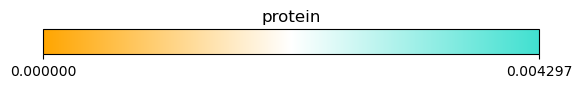

In [9]:
system.pytraj_CA.Spatially_distant.edges.view("btw")
# the same as: system.view(pkg="pytraj_CA", metric="btw", filtering="Spatially_distant", element="edges")